# Holiday Weather - Project 2
From Learning to code for data analysis by Rob Griffiths Dec 2017
Data from Weather Underground
Hasan Ali Jan 2018

Prediciting the Highest temperature days to take a two week vacation in Moscow.

In [56]:
#Import dependencies and enable graphs
from pandas import *
%matplotlib inline

#Ignore warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

#Create Dataframe from Moscow weather data
moscow = read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)
moscow.head()


,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200<br />
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134<br />
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157<br />
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195<br />


## Cleaning the data
Preparing the data for analysis

In [57]:
#Remove <br > from WindDir Degrees column header
moscow = moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [58]:
#Remove <br > from WindDir Degrees column series
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].str.rstrip('<br />')
moscow.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195


In [59]:
#Change value of WindDirDegrees to float64
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].astype('float64')
moscow.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227.0
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200.0
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134.0
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157.0
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195.0


In [60]:
#Change values in Date column to datetime type
moscow['Date'] = to_datetime(moscow['Date'])

#Change index to Date
moscow.index = moscow['Date']
moscow.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227.0
2014-01-02,2014-01-02,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200.0
2014-01-03,2014-01-03,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134.0
2014-01-04,2014-01-04,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157.0
2014-01-05,2014-01-05,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195.0


## Finding a summer break

Detecting the hottest two weeks in the summer months

In [61]:
#Creating a dataframe of just the summer months
summer = moscow.loc[datetime(2014,6,1) : datetime(2014,8,31)]

In [62]:
#look for the days with warm temperatires 
summerMonthsHighTemps = summer[summer['Mean TemperatureC'] >= 25]
summerMonthsHighTemps.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10.0,9.0,5.0,29,11,40.0,0.0,6.0,Rain,236.0
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10.0,10.0,9.0,47,5,68.0,0.0,6.0,Rain-Thunderstorm,35.0


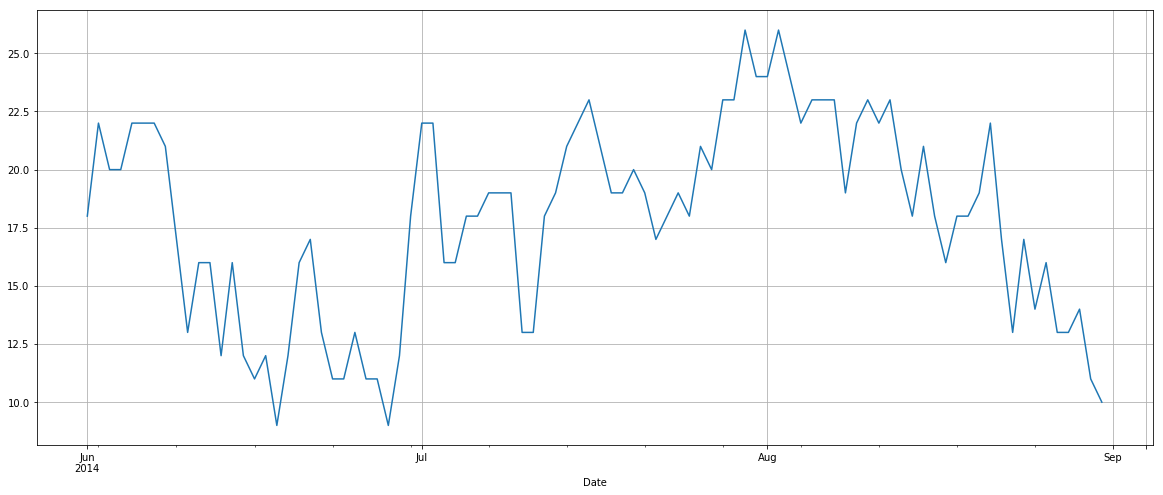

In [69]:
#Display a graph
summer['Mean TemperatureC'].plot(grid=True, figsize=(20,8))

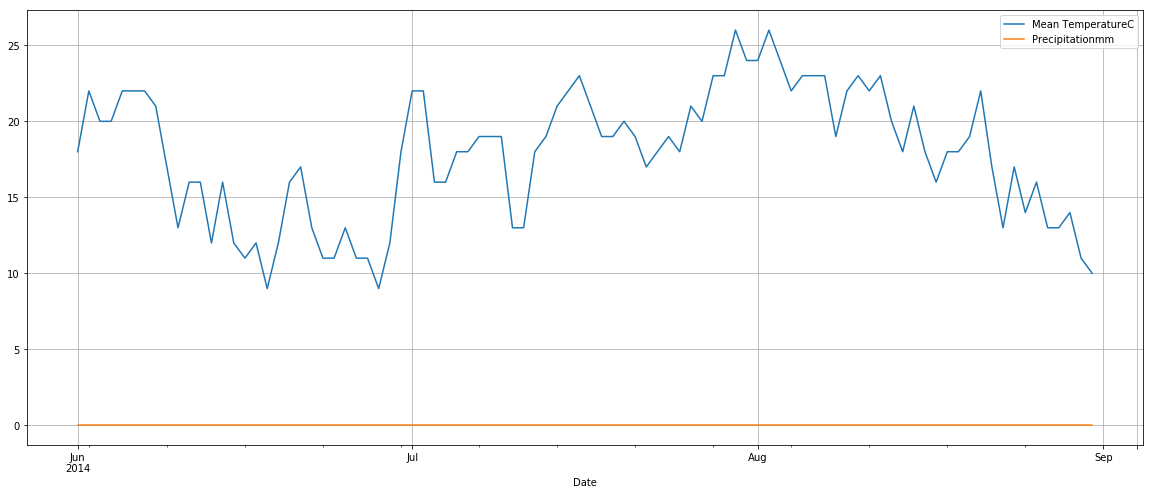

In [90]:
#Add percipitatation to graph
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(20,8))

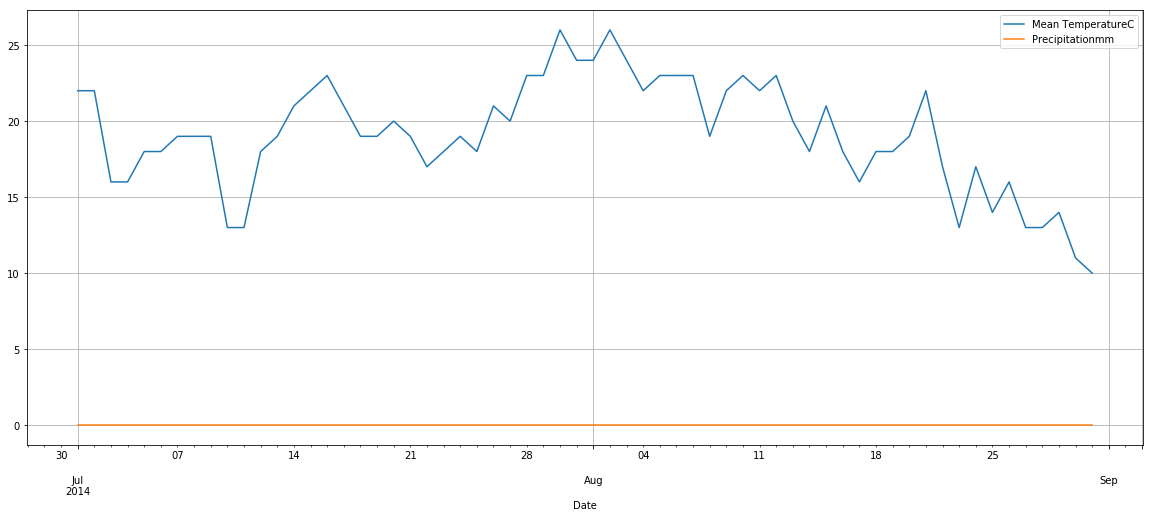

In [92]:
#plot only August and July, the hottest months
julyaug = summer.loc[datetime(2014,7,1) : datetime(2014,8,31)]
julyaug[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(20,8))

## Conclusion
The graphs indicate that the end of July and the beginning of August were had the hottest average temperatures in Moscow. Unfortunately, it appears that precipitation information was not collected thus no conclusions on rain can be made.  